<img src='img_notebook/kpmgimg1.png' width = 300>

# VIX - Data Analytics KPMG TASK-2
**by: kintan Pitaloka Winasih**

**Their marketing team is looking to boost business by 
analysing their existing customer dataset to determine customer trends and behaviour.**

# Data Understanding

## Data Preparation

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [96]:
custadress = pd.read_csv('Clean_CustomerAddress.csv', low_memory=False, encoding='latin-1')
custdemo = pd.read_csv('Clean_CustomerDemographic.csv', low_memory=False, encoding='latin-1')
transactions = pd.read_csv('Clean_Transaction.csv', low_memory=False, encoding='latin-1')

at here we have 4 dataframes to recognize

In [97]:
custdemo.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
1779,607,Adelaida,Redmond,Female,55,1976-10-08,Dental Hygienist,Health,Mass Customer,No,15,50
2406,1414,Allison,Clowton,Female,57,1980-02-29,Help Desk Technician,Retail,Mass Customer,Yes,10,40
3725,370,Trstram,Bondesen,Male,91,1998-07-27,Senior Sales Associate,Telecommunications,Affluent Customer,Yes,3,20


In [98]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   int64 
 1   first_name                           4000 non-null   object
 2   last_name                            4000 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   int64 
 5   DOB                                  4000 non-null   object
 6   job_title                            4000 non-null   object
 7   job_industry_category                4000 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               4000 non-null   int64 
 11  age_class                            4000 n

In [99]:
# remove irrelevant columns for analysis in customer demographic 
custdemo1 = custdemo.copy()
custdemo1.drop(columns=['DOB', 'first_name', 'last_name'], inplace=True)

In [100]:
# convert datatype customer id
custdemo1['customer_id']= custdemo1['customer_id'].astype('object')

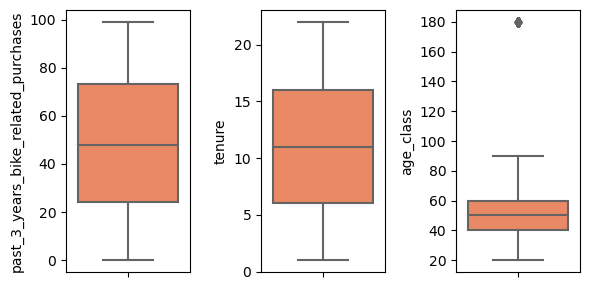

In [101]:
# check outlier
nums = custdemo1.loc[:, (custdemo1.dtypes == 'int64')].columns.tolist()
plt.figure(figsize=(6, 3))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=custdemo1[nums[i]], color='coral', orient='v')
    plt.tight_layout()

### Custaddress

In [102]:
custadress.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,No,6,90
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,No,5,90
2,3410,Merrili,Brittin,Female,93,1940-09-22,VP Quality Control,Property,Mass Customer,No,16,80


In [103]:
custadress.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
3987,3365,Karlens,Chaffyn,Female,29,1843-12-21,Engineer III,IT,Mass Customer,No,20,180
1218,1855,Foss,Yanele,Male,2,1971-08-07,Librarian,Entertainment,Mass Customer,Yes,18,50
3482,3313,Kori,Antoshin,Female,10,1995-03-15,Graphic Designer,Property,High Net Worth,Yes,5,30


In [104]:
custadress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   int64 
 1   first_name                           4000 non-null   object
 2   last_name                            4000 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   int64 
 5   DOB                                  4000 non-null   object
 6   job_title                            4000 non-null   object
 7   job_industry_category                4000 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   owns_car                             4000 non-null   object
 10  tenure                               4000 non-null   int64 
 11  age_class                            4000 n

In [105]:
custadress.shape

(4000, 12)

In [106]:
custadress.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age_class
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,48.890000,10.860250,48.435000
std,1154.844867,28.715005,5.761772,23.632401
min,1.000000,0.000000,1.000000,20.000000
25%,1000.750000,24.000000,6.000000,40.000000
50%,2000.500000,48.000000,11.000000,50.000000
75%,3000.250000,73.000000,16.000000,60.000000
max,4000.000000,99.000000,22.000000,180.000000


In [107]:
custadress.describe(include=["object"])

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,owns_car
count,4000,4000,4000,4000,4000,4000,4000,4000
unique,3139,3843,2,3448,195,9,3,2
top,Tobe,Pristnor,Female,1843-12-21,Social Worker,Financial Services,Mass Customer,Yes
freq,5,3,2127,88,53,943,2000,2024


In [108]:
custadress.isnull().any()

customer_id                            False
first_name                             False
last_name                              False
gender                                 False
past_3_years_bike_related_purchases    False
DOB                                    False
job_title                              False
job_industry_category                  False
wealth_segment                         False
owns_car                               False
tenure                                 False
age_class                              False
dtype: bool

In [109]:
# convert datatype customer id
custadress1['customer_id']= custadress1['customer_id'].astype('object')

In [110]:
custadress.duplicated().any()

False

**summary :**
   1. no duplicate values
   2. no null values
   3. 9999 rows, 6 colomns

### data at customer address is clear

## Transaction

In [111]:
transactions.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,"71,49",5362.0,2012-12-04
1,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,"2091,47",38892.0,2014-03-05
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,"1793,43",24882.0,1999-07-22


In [112]:
transactions.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
11596,12024,3,1346,2017-03-02,True,Trek Bicycles,Standard,medium,large,"2091,47",38892.0,2012-09-17
4070,4197,56,2645,2017-04-29,True,Norco Bicycles,Mountain,low,small,"688,63",61288.0,2011-05-09
14483,15036,34,1327,2017-03-02,True,Norco Bicycles,Road,high,large,"774,53",46472.0,2003-03-20


In [113]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19273 entries, 0 to 19272
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19273 non-null  int64  
 1   product_id               19273 non-null  int64  
 2   customer_id              19273 non-null  int64  
 3   transaction_date         19273 non-null  object 
 4   online_order             19273 non-null  bool   
 5   brand                    19273 non-null  object 
 6   product_line             19273 non-null  object 
 7   product_class            19273 non-null  object 
 8   product_size             19273 non-null  object 
 9   list_price               19273 non-null  object 
 10  standard_cost            19273 non-null  float64
 11  product_first_sold_date  19273 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 1.6+ MB


In [114]:
transactions.describe()

,transaction_id,product_id,customer_id,standard_cost
count,19273.000000,19273.000000,19273.000000,1.927300e+04
mean,9994.783324,45.776838,1739.545738,6.877355e+05
std,5780.372664,30.580267,1011.845427,5.654530e+07
min,1.000000,0.000000,1.000000,1.043770e+00
25%,4978.000000,18.000000,857.000000,1.087600e+04
50%,9993.000000,45.000000,1740.000000,3.807400e+04
75%,15006.000000,72.000000,2615.000000,6.494900e+04
max,20000.000000,100.000000,5034.000000,6.674000e+09


In [115]:
transactions.describe(include=["object"])

,transaction_date,brand,product_line,product_class,product_size,list_price,product_first_sold_date
count,19273,19273,19273,19273,19273,19273,19273
unique,364,6,4,3,3,100,100
top,2017-08-18,Solex,Standard,medium,medium,"2091,47",1992-10-04
freq,81,4128,13795,13467,12658,456,228


In [116]:
transactions.shape

(19273, 12)

In [117]:
transactions.duplicated().any()

False

In [118]:
transactions.isnull().any()

transaction_id             False
product_id                 False
customer_id                False
transaction_date           False
online_order               False
brand                      False
product_line               False
product_class              False
product_size               False
list_price                 False
standard_cost              False
product_first_sold_date    False
dtype: bool

In [119]:
# convert to datetime
trans1 = transactions.copy()
dt = ['transaction_date', 'product_first_sold_date']
trans1[dt] = trans1[dt].astype('datetime64[ns]')

In [120]:
# covert to object
ls_id = ['transaction_id', 'product_id', 'customer_id']
trans1[ls_id] = trans1[ls_id].astype('object')

## **Combine the Dataset Into Single Dataset**

### merge demographic and adress

In [124]:
# merge data demographic and addres
custdemo = pd.merge(custdemo1, custadress1, on='customer_id')
custdemo.sample(2)

,customer_id,gender_x,past_3_years_bike_related_purchases_x,job_title_x,job_industry_category_x,wealth_segment_x,owns_car_x,tenure_x,age_class_x,first_name,last_name,gender_y,past_3_years_bike_related_purchases_y,DOB,job_title_y,job_industry_category_y,wealth_segment_y,owns_car_y,tenure_y,age_class_y
3783,2620,Male,26,Civil Engineer,Manufacturing,Mass Customer,No,1,20,Henderson,Koubek,Male,26,1999-04-30,Civil Engineer,Manufacturing,Mass Customer,No,1,20
167,615,Female,93,Human Resources Assistant I,Property,Mass Customer,No,19,70,Rebeca,Martonfi,Female,93,1956-11-05,Human Resources Assistant I,Property,Mass Customer,No,19,70


In [125]:
data_all = pd.merge(trans1, custadress1, on='customer_id')
data_all.sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
10477,9807,11,1742,2017-10-03,True,Trek Bicycles,Standard,medium,small,"1775,81",...,Dublin,Male,48,1958-08-17,Tax Accountant,Manufacturing,High Net Worth,No,13,60
11763,16000,29,1413,2017-12-27,True,Norco Bicycles,Road,medium,medium,"543,39",...,Lauga,Female,47,1998-04-24,Administrative Assistant II,Financial Services,Mass Customer,No,3,20


In [126]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19270 entries, 0 to 19269
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19270 non-null  object        
 1   product_id                           19270 non-null  object        
 2   customer_id                          19270 non-null  object        
 3   transaction_date                     19270 non-null  datetime64[ns]
 4   online_order                         19270 non-null  bool          
 5   brand                                19270 non-null  object        
 6   product_line                         19270 non-null  object        
 7   product_class                        19270 non-null  object        
 8   product_size                         19270 non-null  object        
 9   list_price                           19270 non-null  object        
 10  standard_c

## Exploratory Data Analysis ~

In [127]:
# making a copy of dataset for backing up
data_merged = data_all.copy()
data_merged.reset_index(inplace = True, drop = True)

### Transaction Data ~

In [128]:
# making backup dataset
data_transaction = data_merged.copy()

**deeper analysis of datetime data by breaking it down into more specific parts.**

In [130]:
# deeper analysis of datetime data by breaking it down into more specific parts
data_transaction['transaction_year'] = data_transaction['transaction_date'].dt.strftime('%Y')
data_transaction['transaction_month'] = data_transaction['transaction_date'].dt.strftime('%B')
data_transaction['transaction_quarter'] = data_transaction['transaction_date'].dt.quarter.astype(str)
data_transaction['transaction_day'] = data_transaction['transaction_date'].dt.strftime('%d')
data_transaction['transaction_weekday'] = data_transaction['transaction_date'].dt.strftime('%A')
data_transaction.drop(['transaction_date'],axis=1,inplace=True)

**ststistical summary**

In [131]:
data_transaction.describe()

,standard_cost,past_3_years_bike_related_purchases,tenure,age_class
count,19270.000000,19270.000000,19270.000000,19270.000000
mean,38940.151415,48.813856,10.877841,48.436430
std,30045.194530,28.576588,5.782621,23.864519
min,1.043770,0.000000,1.000000,20.000000
25%,10876.000000,24.000000,6.000000,40.000000
50%,38074.000000,48.000000,11.000000,50.000000
75%,64949.000000,73.000000,16.000000,60.000000
max,99366.000000,99.000000,22.000000,180.000000


In [132]:
# descriptive statistic
data_transaction[data_transaction.columns.tolist()[22:27]].describe().T

,count,unique,top,freq
transaction_year,19270,1,2017,19270
transaction_month,19270,12,August,1728
transaction_quarter,19270,4,3,4907
transaction_day,19270,31,18,688
transaction_weekday,19270,7,Sunday,2796


**summary**
- **top transactions** in 2017, august
- **Largest monthly** transaction occur in **August**
- **Largest quarter** transaction occur in **fourth quarter**
- **Largest day** transaction in a month usually occur on **18th**
- **Largest daily** transaction in a week usually occur on **Wednesday**

**Finding the number transactions per month**

In [134]:
# aggregate by month
transaction_per_month = data_transaction.groupby(['transaction_month'])[['customer_id']].count()
transaction_per_month.reset_index(inplace=True)
transaction_per_month.columns = ['month', 'number_of_transaction']

# order by month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
transaction_per_month['month'] = pd.Categorical(transaction_per_month['month'], month_order)
transaction_per_month.sort_values('month', inplace=True)
transaction_per_month

,month,number_of_transaction
4,January,1625
3,February,1557
7,March,1589
0,April,1551
8,May,1624
6,June,1532
5,July,1617
1,August,1728
11,September,1562
10,October,1689


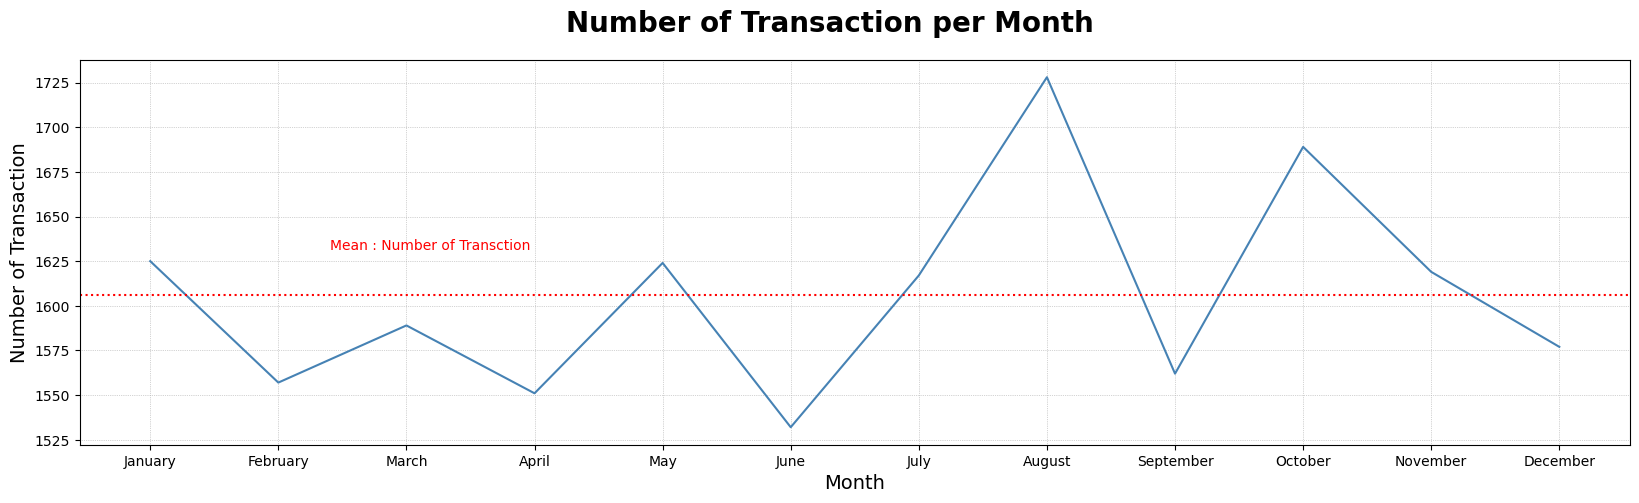

In [135]:
# visualization
fig = plt.figure(figsize=(20, 5))

fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = transaction_per_month['month']
y = transaction_per_month['number_of_transaction']
mean = y.mean()

plt.plot(x, y, color = 'steelblue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.axhline(y=mean, color='red', linestyle=':')
plt.text(0.25, 0.5, 'Mean : Number of Transction', transform=fig.transFigure, color='red')
plt.show()

as we can see the transaction decreased in Juny and September. and after this transactions increased significantly as seen in August and October.

**Number of transactions per day**

In [136]:
month_daily_transaction = data_transaction.groupby(['transaction_month','transaction_day'])[['customer_id']].count()
month_daily_transaction.reset_index(inplace=True)
month_daily_transaction.columns = ['month','day','number_of_transaction']

month_daily_transaction['month'] = pd.Categorical(month_daily_transaction['month'], month_order)
month_daily_transaction.sort_values(['month','day'], inplace=True)
month_daily_transaction

,month,day,number_of_transaction
119,January,01,52
120,January,02,52
121,January,03,54
122,January,04,58
123,January,05,63
...,...,...,...
86,December,26,54
87,December,27,50
88,December,28,55
89,December,29,51


<AxesSubplot:xlabel='day', ylabel='month'>

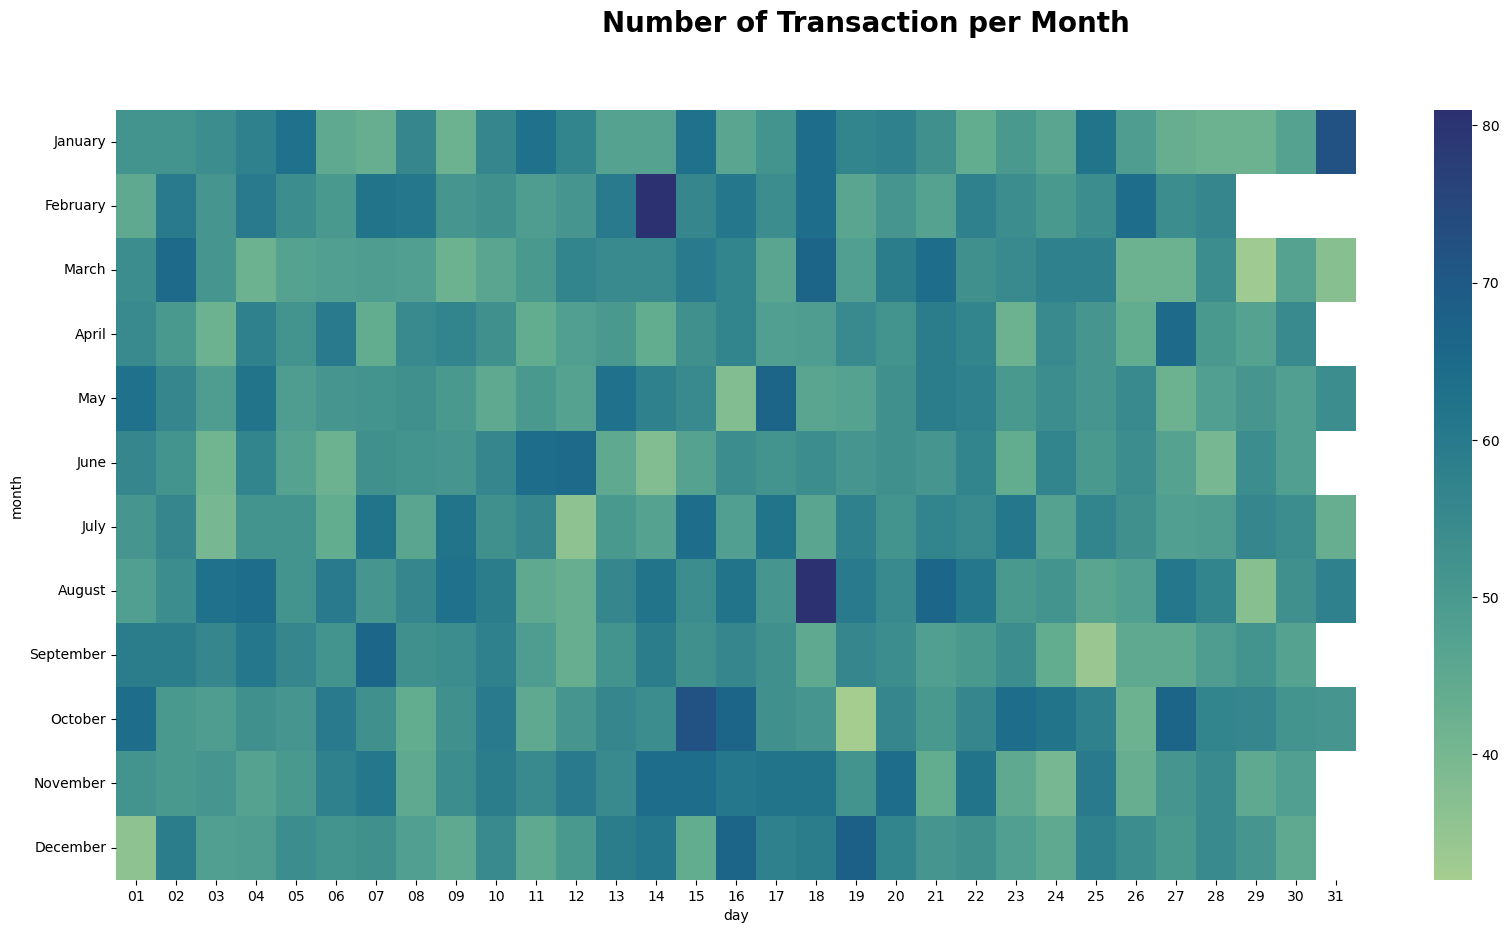

In [139]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Number of Transaction per Month', fontsize=20, fontweight='bold')
map = month_daily_transaction.pivot('month', 'day', 'number_of_transaction')
sns.heatmap(map, cmap='crest')

The number of transactions/day tends to fluctuate, with **significant spikes on February 14th and 18th**

**Daily transactions Trends**

In [142]:
daily_transaction = data_transaction.groupby(['transaction_weekday'])[['customer_id']].count()
daily_transaction.reset_index(inplace=True)
daily_transaction.columns = ['weekday','number_of_transaction']

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transaction['weekday'] = pd.Categorical(daily_transaction['weekday'], weekday_order)
daily_transaction.sort_values('weekday', inplace=True)
daily_transaction

,weekday,number_of_transaction
1,Monday,2746
5,Tuesday,2771
6,Wednesday,2742
4,Thursday,2773
0,Friday,2684
2,Saturday,2758
3,Sunday,2796


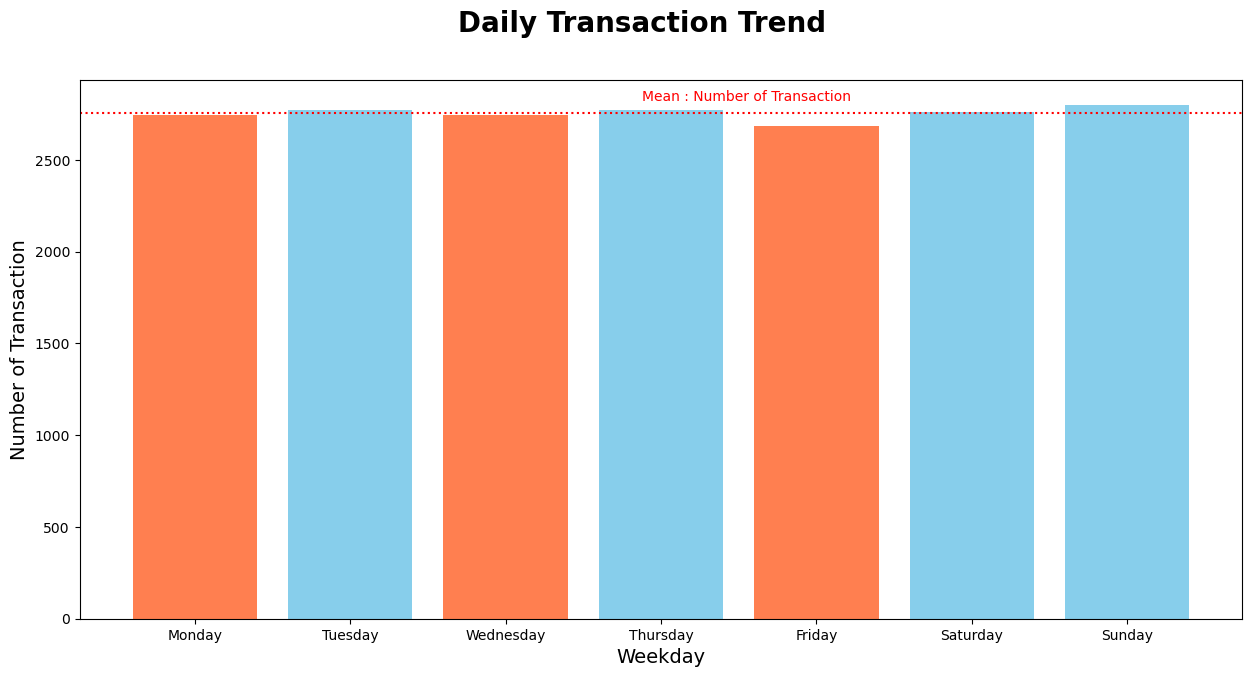

In [144]:
# visualization
fig = plt.figure(figsize=(15, 7))

fig.suptitle('Daily Transaction Trend', fontsize=20, fontweight='bold')
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Number of Transaction', fontsize=14)

x = daily_transaction['weekday']
y = daily_transaction['number_of_transaction']
mean = y.mean()

colors = []
for value in daily_transaction['number_of_transaction']:
    if value < mean:
        colors.append('coral')
    else:
        colors.append('skyblue')

plt.bar(x, y, color=colors)
plt.axhline(y=mean, color='r', linestyle=':')
plt.text(0.5, 0.85, 'Mean : Number of Transaction', transform=fig.transFigure, color='r')
plt.show()

**Summary:**

- as we can see the overall number of daily transactions is not significantly different.
- moday and wednesday is busiest day
- thursday - friday are above average, when it comes to the weekend there is a decrease in transactions

### Product Data ~

In [147]:
data_product = data_merged.copy()

In [148]:
stat = data_product[['brand', 'product_line', 'product_class', 'product_size']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

,count,unique,top,freq,% top
brand,19270,6,Solex,4127,21.41671
product_line,19270,4,Standard,13794,71.582771
product_class,19270,3,medium,13464,69.870265
product_size,19270,3,medium,12655,65.672029


- The **brand most purchased** by customers is **Solex** with a percentage of **21.41%**.
- The majority of customers **71.58% purchased Standard** bikes.
- There are **69.87%** of customers purchased a **medium class** bikes.
- There are **65.678%** of customers purchased a **medium size** bikes.

In [150]:
# brand percentage
brand = data_product['brand'].value_counts().reset_index()
brand.columns = ['brand', 'count']
brand['percentage'] = (brand['count']/brand['count'].sum()*100).round(2)
brand

,brand,count,percentage
0,Solex,4127,21.42
1,Giant Bicycles,3217,16.69
2,WeareA2B,3215,16.68
3,OHM Cycles,2966,15.39
4,Trek Bicycles,2906,15.08
5,Norco Bicycles,2839,14.73


Text(0.5, 1.0, 'Percentage of Brand')

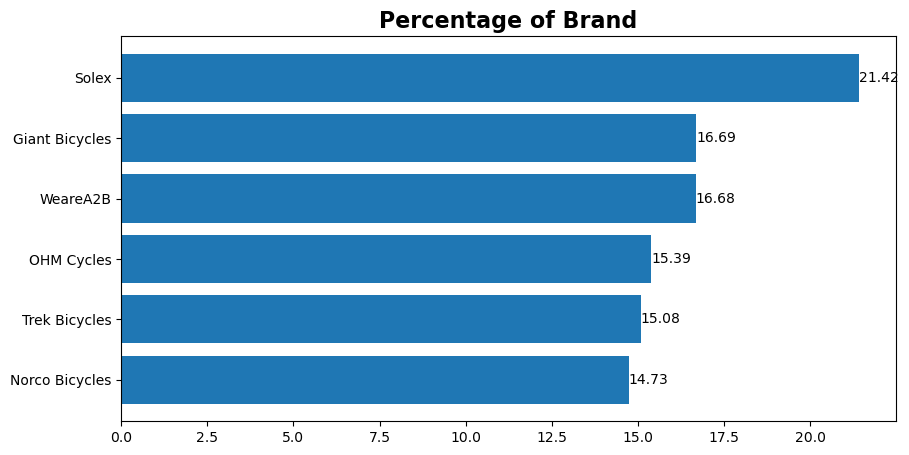

In [151]:
# visualizing job industry
fig, ax = plt.subplots(figsize=(10,5))

brand_sort = brand.sort_values(by=['percentage']).reset_index(drop=True)

bars = plt.barh(y=brand_sort['brand'], width= brand_sort['percentage'])
plt.bar_label(ax.containers[0]) 
plt.title('Percentage of Brand', fontsize=16, fontweight='bold')


#### **Percentage of Product Line with Brand Distribution**

In [152]:
line = data_product.groupby(['brand', 'product_line'])['product_line'].count()
line = line.reset_index(name='count')
line['percentage'] =  (100 * line['count'] / line.groupby('brand')['count'].transform('sum')).round(2)

pvt = line.pivot_table(columns='product_line', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                         percentage                  \
product_line   Mountain   Road Standard Touring   Mountain   Road Standard   
brand                                                                        
Giant Bicycles      0.0  567.0   2475.0   175.0       0.00  17.63    76.94   
Norco Bicycles    194.0  901.0   1744.0     0.0       6.83  31.74    61.43   
OHM Cycles          0.0  758.0   1983.0   225.0       0.00  25.56    66.86   
Solex               0.0  515.0   3414.0   198.0       0.00  12.48    82.72   
Trek Bicycles     221.0  964.0   1721.0     0.0       7.60  33.17    59.22   
WeareA2B            0.0  152.0   2457.0   606.0       0.00   4.73    76.42   

                        
product_line   Touring  
brand                   
Giant Bicycles    5.44  
Norco Bicycles    0.00  
OHM Cycles        7.59  
Solex             4.80  
Trek Bicycles     0.00  
WeareA2B         18.85

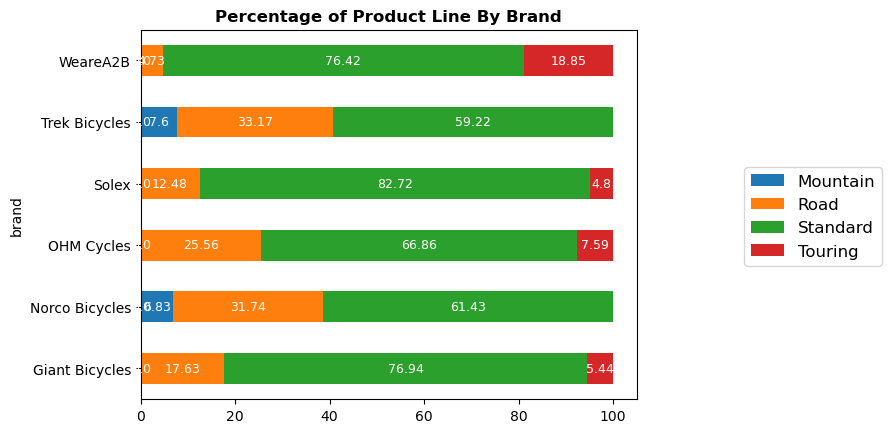

In [153]:
#visualization
pvt_count = line.pivot_table(index='brand', columns='product_line', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Line By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')

plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Class with Brand Distribution**

In [155]:
clas = data_product.groupby(['brand', 'product_class'])['product_class'].count()
clas = clas.reset_index(name='count')
clas['percentage'] =  (100 * clas['count'] / clas.groupby('brand')['count'].transform('sum')).round(2)

pvt = clas.pivot_table(columns='product_class', index='brand', values=['count', 'percentage'])
pvt.fillna(0)

count                percentage              
product_class    high    low  medium       high    low medium
brand                                                        
Giant Bicycles  758.0  190.0  2269.0      23.56   5.91  70.53
Norco Bicycles  554.0  613.0  1672.0      19.51  21.59  58.89
OHM Cycles      747.0  597.0  1622.0      25.19  20.13  54.69
Solex           547.0  397.0  3183.0      13.25   9.62  77.13
Trek Bicycles   312.0  769.0  1825.0      10.74  26.46  62.80
WeareA2B          0.0  322.0  2893.0       0.00  10.02  89.98

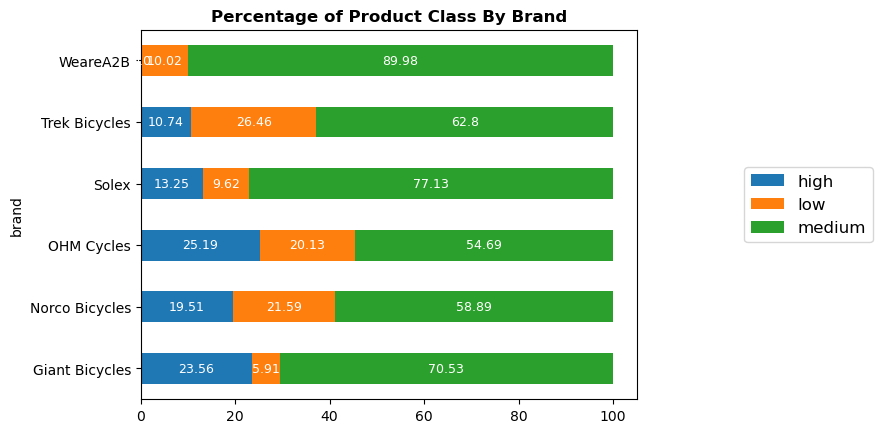

In [156]:
pvt_count = clas.pivot_table(index='brand', columns='product_class', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Class By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

#### **Percentage of Product Size with Brand Distribution**
---

In [158]:
size = data_product.groupby(['brand', 'product_size'])['product_size'].count()
size = size.reset_index(name='count')
size['percentage'] =  (100 * size['count'] / size.groupby('brand')['count'].transform('sum')).round(2)

pvt = size.pivot_table(columns='product_size', index='brand', values=['count', 'percentage'])
pvt

count              percentage              
product_size   large medium small      large medium  small
brand                                                     
Giant Bicycles   917   1732   568      28.50  53.84  17.66
Norco Bicycles   400   1693   746      14.09  59.63  26.28
OHM Cycles       192   2581   193       6.47  87.02   6.51
Solex           1055   2894   178      25.56  70.12   4.31
Trek Bicycles    881   1493   532      30.32  51.38  18.31
WeareA2B         418   2262   535      13.00  70.36  16.64

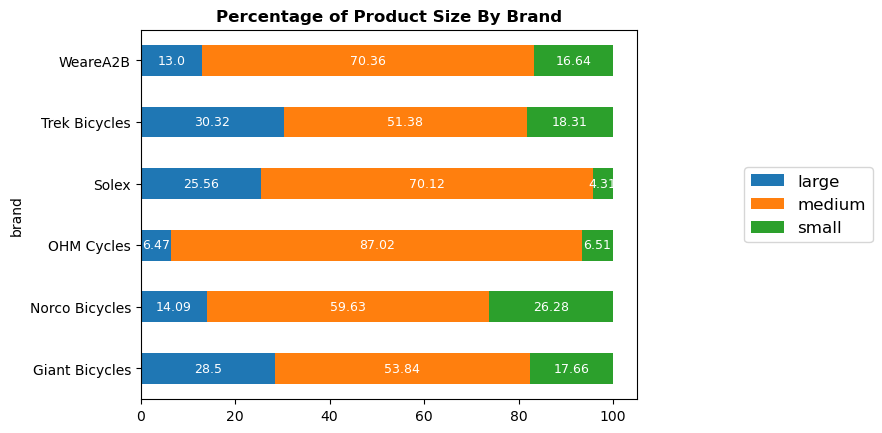

In [159]:
pvt_count = size.pivot_table(index='brand', columns='product_size', values='percentage')

ax = pvt_count.plot(kind='barh', stacked=True)
plt.title('Percentage of Product Size By Brand', fontweight='bold')
plt.xticks(rotation=360)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width, 2)), xy=(left+width/2, bottom+height/2), ha='center', va='center', fontsize=9, color='white')
    
plt.legend(bbox_to_anchor=(1.2, 0.65), fontsize=12)

### New Customer List

In [137]:
newcustlist.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,12/07/1957,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,"0,75","0,9375","1,171875","0,99609375",1,1,"1,71875"
1,Morly,Genery,Male,69,22/03/1970,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,"0,55","0,55","0,6875","0,584375",1,1,"1,71875"
2,Ardelis,Forrester,Female,10,28/08/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,"0,91","0,91","0,91","0,91",1,1,"1,71875"
3,Lucine,Stutt,Female,64,28/01/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,"1,06","1,325","1,325","1,325",4,4,"1,703125"
4,Melinda,Hadlee,Female,34,21/09/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,"0,8","0,8",1,1,4,4,"1,703125"


In [138]:
newcustlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   int64 
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   int64 
 11  address                              1000 no

In [139]:
newcustlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   int64 
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   int64 
 11  address                              1000 no

In [140]:
newcustlist.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 20,Rank
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,498.819000
std,27.796686,5.037145,848.895767,2.758804,288.810997,288.810997
min,0.000000,0.000000,2000.000000,1.000000,1.000000,1.000000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,250.000000
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,500.000000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,750.250000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1000.000000


In [141]:
newcustlist.describe(include=["object"])

,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,state,country,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Value
count,1000,971,1000,983,894,835,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,940,961,3,958,184,9,3,1,2,1000,3,1,71,129,184,319,319
top,Rozamond,Sissel,Female,05/02/1998,Associate Professor,Financial Services,Mass Customer,N,No,45 Shopko Center,NSW,Australia,"0,5","0,7","0,7","0,7","0,6375"
freq,3,2,513,2,15,203,508,1000,507,1,506,1000,23,21,20,13,13


### Customer Data ~

In [161]:
data_cust = data_merged.copy()

In [164]:
stat = data_cust[['gender', 'job_title', 'job_industry_category', 'wealth_segment', 'owns_car']].describe().T
stat['% top'] = stat['freq']/stat['count']*100
stat

,count,unique,top,freq,% top
gender,19270,2,Female,10098,52.402698
job_title,19270,195,Social Worker,264,1.370005
job_industry_category,19270,9,Financial Services,4571,23.72081
wealth_segment,19270,3,Mass Customer,9681,50.238713
owns_car,19270,2,Yes,9725,50.467047


- There are **52.40%** of customers are **female**.
- Customers have a **variety** of **job titles** with the top job title of **1.26% as Legal Assistants**.
- There are **23.72%** of customers work in the **manufacturing** industry.
- There are **50.23%** of customers come from **Mass Customers**.
- There are **50.46%** of customers **having own car**.
- The majority of customers, **53.37%**, are from **New South Wales**.

**Wealth Segment**

In [167]:
# wealth segment percentage
wealth = data_cust['wealth_segment'].value_counts().reset_index()
wealth.columns = ['wealth_segment', 'count']
wealth['percentage'] = (wealth['count']/wealth['count'].sum()*100).round(2)
wealth

,wealth_segment,count,percentage
0,Mass Customer,9681,50.24
1,High Net Worth,4923,25.55
2,Affluent Customer,4666,24.21


**Job Industry**

In [170]:
# job industry percentage
industry = data_cust['job_industry_category'].value_counts().reset_index()
industry.columns = ['job_industry', 'count']
industry['percentage'] = (industry['count']/industry['count'].sum()*100).round(2)
industry

,job_industry,count,percentage
0,Financial Services,4571,23.72
1,Manufacturing,4486,23.28
2,Health,3573,18.54
3,Retail,2071,10.75
4,Property,1481,7.69
5,IT,1164,6.04
6,Entertainment,852,4.42
7,Argiculture,666,3.46
8,Telecommunications,406,2.11


In [171]:
# top 10 job title
title = data_cust['job_title'].value_counts().reset_index()
title.columns = ['job_title', 'count']
title['percentage'] = (title['count']/title['count'].sum()*100).round(2)
top10title = title.head(10)
top10title

,job_title,count,percentage
0,Social Worker,264,1.37
1,Business Systems Development Analyst,247,1.28
2,Legal Assistant,241,1.25
3,Assistant Professor,240,1.25
4,Research Nurse,234,1.21
5,Recruiting Manager,228,1.18
6,Nuclear Power Engineer,227,1.18
7,Internal Auditor,223,1.16
8,Associate Professor,221,1.15
9,Assistant Media Planner,218,1.13


_________

# RFM ANALYSIS

## 1. Data Preparation

first, we must calculate the last purchase from transactions_date column, and get the monetary valur, we have to create a new profit column.

In [176]:
data_rfm = data_merged.copy()

In [178]:
# making last purchase column for recency
most_recent_purchase = data_rfm['transaction_date'].max()
data_rfm['last_purchase_days_ago'] = most_recent_purchase - data_rfm['transaction_date']
data_rfm['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
data_rfm['last_purchase_days_ago'] = data_rfm['last_purchase_days_ago'].astype('int64')

# making column profit for monetery
data_rfm['profit'] = data_rfm['list_price'] - data_rfm['standard_cost']

TypeError: unsupported operand type(s) for -: 'str' and 'float'

## 2. Data Aggregation

## 3. Scoring

## 4. Segmentation and Score Labeling

## 5. Analysis

## 6. Customer Demographic Analysis Based on RFM

## 7. Targeted Customer Demographic

## 8. Conclusion